In [2]:
#IMPORT LIBRARIES
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#matplotlib inline
#plt.style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (15,5)

In [3]:
#importing or loading the dataset
df_dataset = pd.read_csv('C:/Users/Chury Sungita/Desktop/sw-effort-predictive-analysis/Datasets/sw_dataset.csv')

In [4]:
#The DataFrame.head() function in Pandas, by default, shows you the top 5 rows of data in the DataFram
df_dataset.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [12]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [5]:
#describe() helps to get a basic insight of the dataset with min and max 
#values along with mean, median, standard deviation & several others.

df_dataset.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [10]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored
df_dataset.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


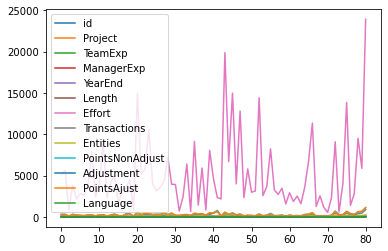

In [6]:
#The plot() function in pyplot module of matplotlib library is used to make a 2D hexagonal binning plot of points x, y
#The show() function in pyplot module of matplotlib library is used to display all figures.

df_dataset.plot()

plt.show()

In [8]:
#Feature selection and extraction
#Feature selection can be done in multiple ways but there are broadly 3 categories of it:
#1. Filter Method
#2. Wrapper Method
#3. Embedded Method
#We are going to use  Filter Method:

#In this stage, we filter and take only the subset of the relevant features. The model is built after selecting the features. 
#The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

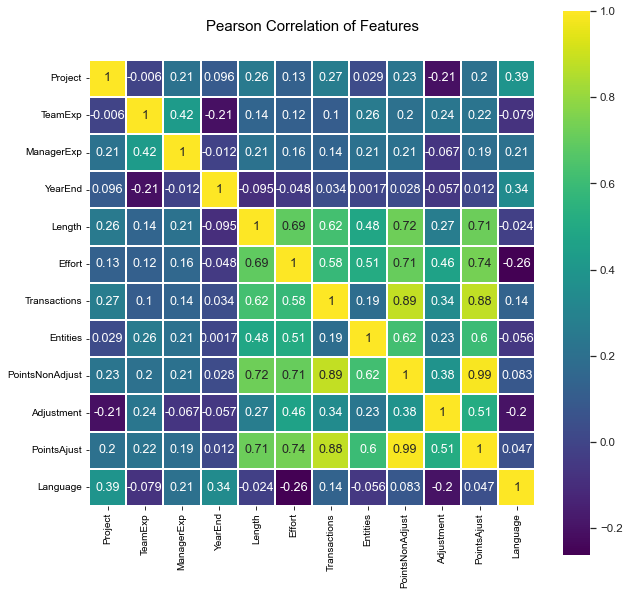

In [7]:
#Using Pearson Correlation
#Here we will first plot the Pearson correlation heatmap and 
#see the correlation of independent variables with the output variable ['Effort']
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_dataset.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [8]:
#Split the data
#Listing and defining features in array , an attribute ['id'] has been dropped from above pearson correlation
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

#will only select features which has correlation of above 0.5 (taking absolute or approach value) with the output variable.
#The correlation coefficient has values between -1 to 1
# A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
# A value closer to 1 implies stronger positive correlation
# A value closer to -1 implies stronger negative correlation

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

##Create x and y variables.
X = df_dataset[max_corr_features]
y = df_dataset['Effort']

In [9]:
df_dataset.shape

(81, 13)

In [33]:
# split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =30)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (60, 5) (60,)
Testing set shape:  (21, 5) (21,)


In [9]:
#Traing set and Test set splitting
#1.KNEIGHBORSREGRESSION
#random_state is a parameter to fix the way the data is being sampled. Therefore, if you want to reproduce the same model
#you choose any value for random_state and next time you run your code you will get the same data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')

#fit () is implemented by every estimator and it accepts an input for the sample data (X) 
#and for supervised models it also accepts an argument for labels (ie target data y)
neigh.fit(X_train, y_train) 

#score(X_train,Y_train) is measuring the accuracy of the model 
#against the training data. (How well the model explains the data it was trained with).
print(neigh.score(X_test, y_test))

0.7124067273589926


In [13]:
#1.KNEIGHBORSREGRESSION
#EVALUATION OF MODEL KNeighborsRegressor REGRESSION
#finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of 
#max_features

#Now, we have to compare the y_prediction values with the
#original values because we have to calculate the accuracy of our model, which was implemented by a concept called r2_score.
x_prediction =  neigh.predict(X_test)
x_prediction

array([ 6456.33333333,  4830.        ,  6542.66666667,  1817.66666667,
        6456.33333333,  4344.66666667,  1817.66666667,  7639.33333333,
        4652.66666667,  5672.33333333,  1772.        ,  2648.33333333,
        6888.        ,  1970.66666667,  5196.33333333,  2596.        ,
        2086.        , 11601.33333333,  1817.66666667,  6409.66666667,
       11601.33333333,  4223.33333333,  6409.66666667,  2391.66666667,
       14424.66666667])

In [14]:
#1.KNEIGHBORSREGRESSION
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,x_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,x_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,x_prediction)))

r2 score is 0.7124067273589926
mean_sqrd_error is== 3254903.3022222235
root_mean_squared error of is== 1804.1350565360187


In [15]:
#2.LINEAR REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.768007495444071


In [17]:
#EVALUATION OF MODEL LINEAR REGRESSION
#finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of 
#max_features

#Now, we have to compare the y_prediction values with the
#original values because we have to calculate the accuracy of our model, which was implemented by a concept called r2_score.
y_prediction =  model.predict(X_test)
y_prediction

array([10265.23966662,  3448.15454897,  5788.8090226 , 15181.60111618,
        7087.45612963,  5166.7732935 ,  5599.72513249,  3200.84968325,
        2008.07712758,  4174.77841459,  4147.46915554,  1763.98098996,
        4665.18744004,  6175.77053098,  2322.4705474 ,  2402.23076487,
       15765.76733723,  5788.60512905,  1495.33625025,  7206.786617  ,
       11703.16104174,  3541.4776055 , 11294.89491783,  2395.56542892,
        4143.1183703 ,  3043.02992698,  3083.13930132])

In [18]:
#2.LINEAR REGRESSION
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.768007495444071
mean_sqrd_error is== 7183047.127637755
root_mean_squared error of is== 2680.1207300488827


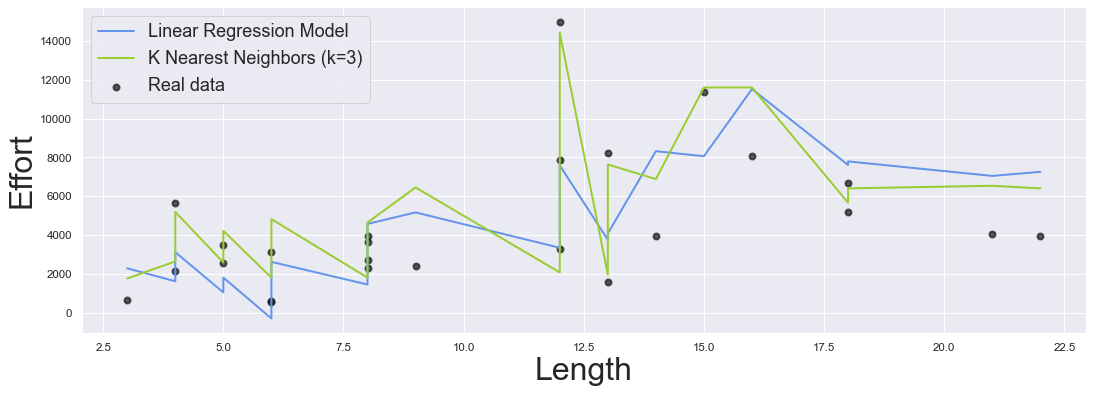

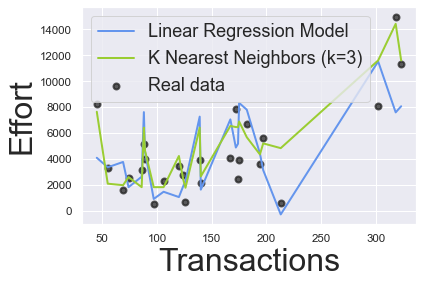

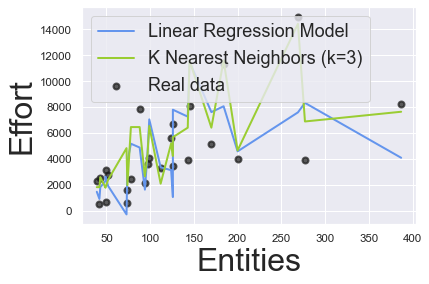

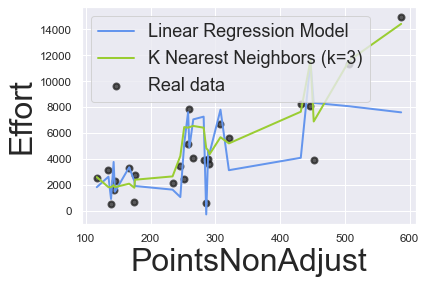

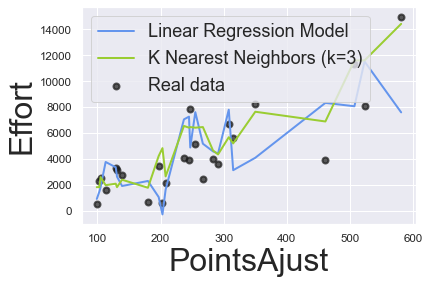

In [39]:
plt.figure(figsize=(18,6))
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.loc']= 'upper left'
plt.rcParams['axes.labelsize']= 32

for i, feature in enumerate(max_corr_features):
   
    # Knn Regression Model 
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    # Linear Regression Model 
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
   # plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support Vector Machine (Kernel=Linear)', c='gold')
    
    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()